<a href="https://colab.research.google.com/github/GimenesPaula/GimenesPaula/blob/main/Processamento_de_Imagem_Micro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Dominant Color
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from collections import Counter
import pprint

In [2]:
#Image Difference with OpenCV and Python
# import the necessary packages
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from keras.preprocessing import image

In [6]:
#Importa arquivo a ser tratado
from google.colab import files
uploaded = files.upload()

Saving 01.jpg to 01.jpg
Saving 02.jpg to 02.jpg
Saving 03.jpg to 03.jpg
Saving 04.jpg to 04.jpg
Saving 05.jpg to 05.jpg
Saving 06.jpg to 06.jpg
Saving 07.jpg to 07.jpg
Saving 08.jpg to 08.jpg
Saving 09.jpg to 09.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14.jpg
Saving 15.jpg to 15.jpg
Saving 16.jpg to 16.jpg
Saving 17.jpg to 17.jpg
Saving 18.jpg to 18.jpg
Saving 19.jpg to 19.jpg
Saving 20.jpg to 20.jpg


In [34]:
c = int(input("tamanho total da figura horizontal: ex 8"))
l = int(input("tamanho total figura verficar: ex. 8"))
a = int(input("Quantas imagens imprimiremos em cada linha"))
b = int(input("Quantas imagens imprimiremos em cada coluna"))

tamanho total da figura horizontal: ex 88
tamanho total figura verficar: ex. 810
Quantas imagens imprimiremos em cada linha4
Quantas imagens imprimiremos em cada coluna5


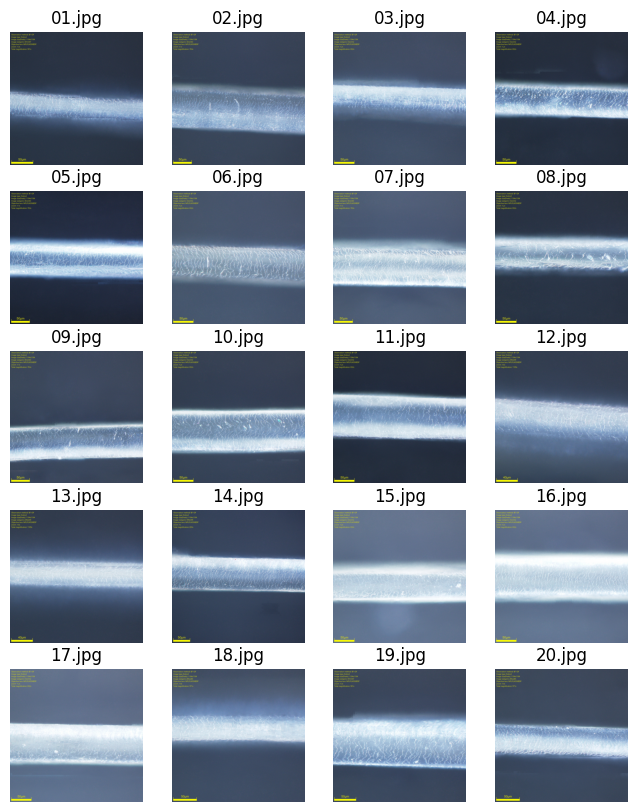

In [37]:
#exibe imagens Original
fig = plt.figure(figsize=(c,l)) #Tamanho da imagem a ser exibida
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
  plt.subplot(b,a,num+1)    # linhas e colunas para exibir imagens
  plt.axis('off')
  plt.title(fn)
  plt.imshow(img)
  #plt.savefig('originais.jpg')

In [38]:
#FUnção para Remoção de ruido: enfatizar bordas
def filtro(img):
  imBlur = cv2.blur(img,(1,1))   # Aplicar filtro galsiano de tamanho nxn. Quanto menor, mais definição
  f = np.fft.fft2(imBlur) # Transforma a imagem para o dominio de frequencia
  fshift = np.fft.fftshift(f) # Centraliza os componentes na frequencia zero
  rows, cols = imBlur.shape #tamanho da imagem
  crow,ccol = round(rows/2) , round(cols/2)
  fshift[crow-1:crow+1, ccol-1:ccol+1] = 0   # Remove intervalo. Quanto menor intervalo, maior a definição das bordas
  f_ishift = np.fft.ifftshift(fshift) #reverte centralização
  img_back = np.fft.ifft2(f_ishift) #inversa da transformada
  img_back = np.abs(img_back)
  return img_back

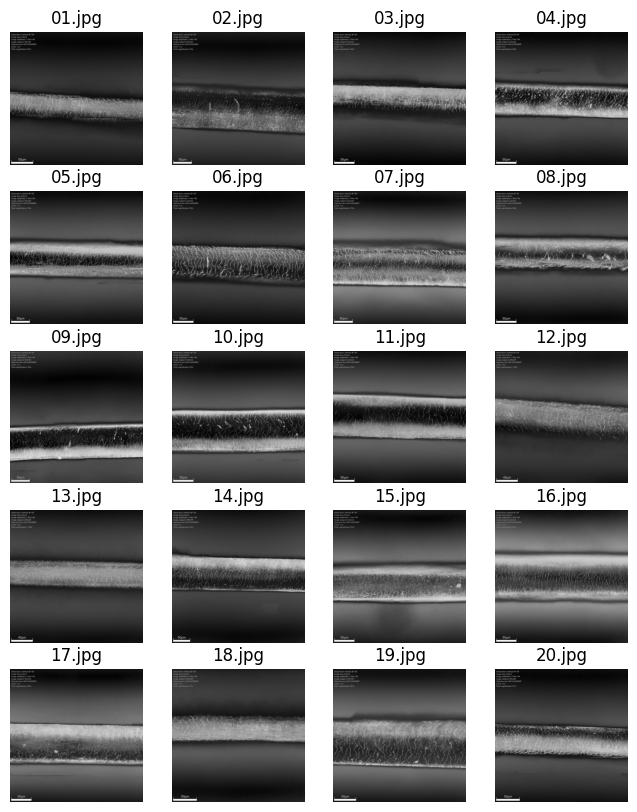

In [39]:
# Imagens transformadas por fourier filtro galsiano
fig = plt.figure(figsize=(c,l))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
  plt.subplot(b,a,num+1) #linhas,colunas do gráfico
  img2=filtro(img)
  plt.axis('off')
  plt.title(fn)
  plt.imshow(img2, cmap = 'gray')
  #plt.savefig('filtrada.jpg')

In [40]:
import matplotlib.mlab as ml

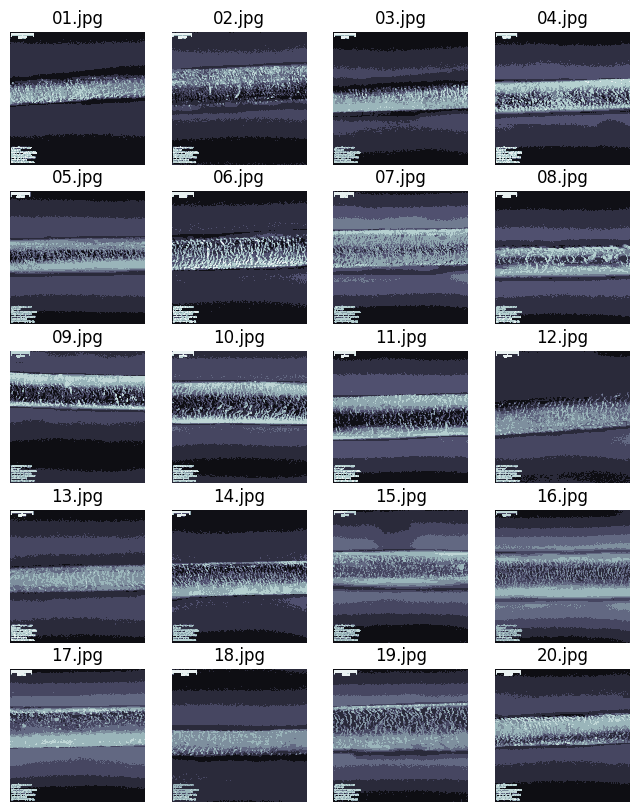

In [41]:
# Análise de contornos por transformada de fourier filtro galsiano
fig = plt.figure(figsize=(c,l))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
  plt.subplot(b,a,num+1) #linhas,colunas do gráfico
  img2=filtro(img)
  plt.axis('off')
  plt.title(fn)
  plt.contourf(img2, cmap=plt.cm.bone,origin='lower')
  #plt.savefig('contorno.jpg')

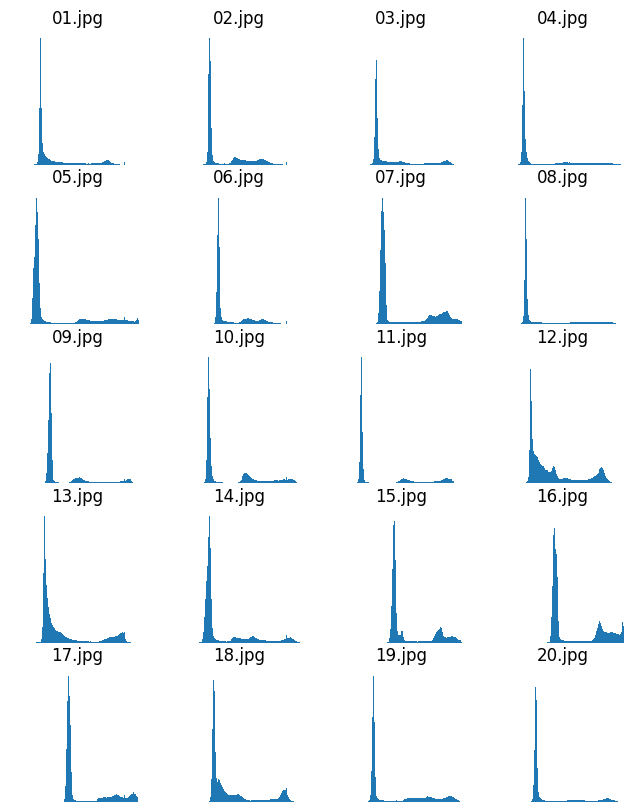

In [42]:
#Imagens em cinza / Histograma
fig = plt.figure(figsize=(c,l))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) #preto e Branco
  plt.subplot(b,a,num+1),plt.hist(img.ravel(),bins = 256, range = [0,256])    #images na grade
  plt.axis('off')
  plt.title(fn)

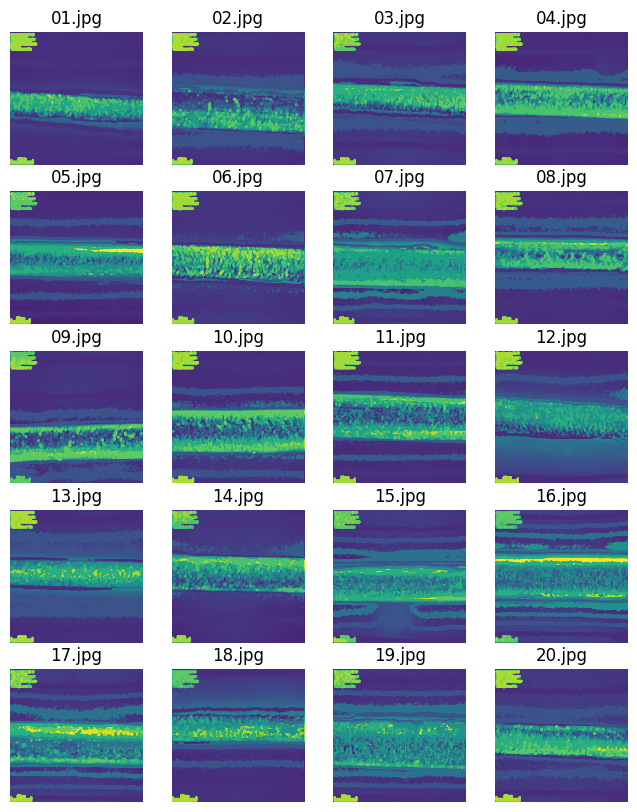

In [43]:
#Imagens em cinza / Contorno
fig = plt.figure(figsize=(c,l))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) #preto e Branco
  img2 = filtro(img)
  plt.subplot(b,a,num+1),plt.contour(img2),plt.imshow(img)  #sobrepoe imagem e contorno no formato de grid
  plt.axis('off')
  plt.title(fn)

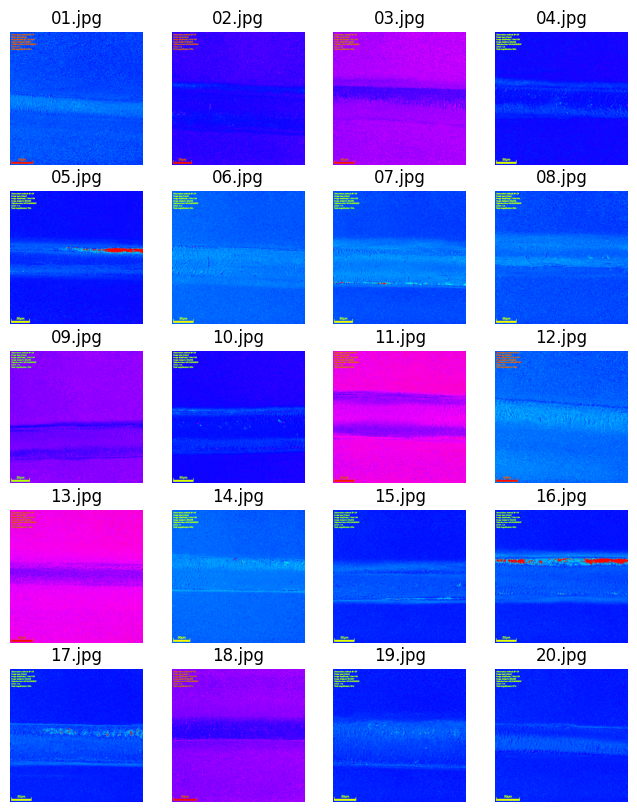

In [44]:
#Imagens em Huve
fig = plt.figure(figsize=(c,l))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #preto e Branco
  plt.subplot(b,a,num+1)
  plt.axis('off')
  plt.title(fn)
  plt.imshow(img[:,:,0], cmap = 'hsv')

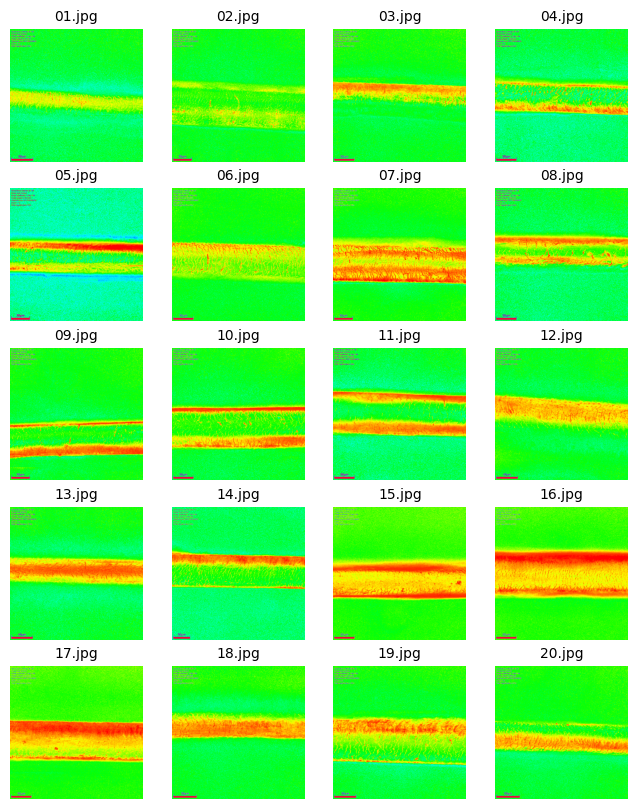

In [45]:
#Imagens em Saturation
fig = plt.figure(figsize=(c,l))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #HSV
  plt.subplot(b,a,num+1),plt.imshow(img[:,:,1], cmap = 'hsv')
  plt.axis('off')
  plt.title(fn,fontsize=10)


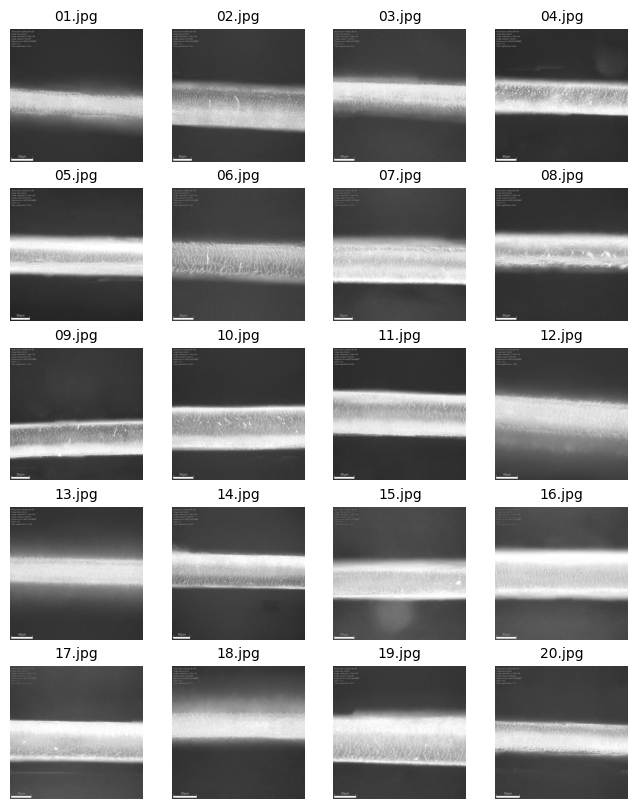

In [46]:
#Compara em Valor
fig = plt.figure(figsize=(c,l))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV)
  plt.subplot(b,a,num+1)
  plt.axis('off')
  plt.title(fn, fontsize=10)
  plt.imshow(img[:,:,2], cmap = 'gray')

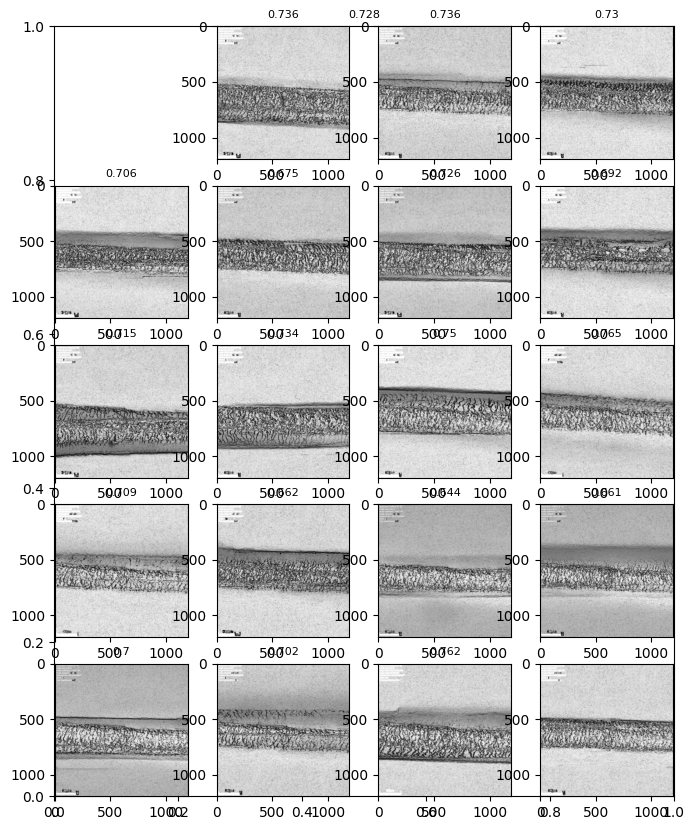

In [47]:
#Calcula Score de diff HSV
fig = plt.figure(figsize=(c,l))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  if num == 0:
    antes = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #BGR2HSV - HSV
  else:
    depois = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV)
    (score, diff) = compare_ssim(depois[:,:,2], antes[:,:,2], full=True) #Comparando 0 = H; 1 = S; 2 = V
    diff = (diff * 255).astype("uint8")
    plt.title("{:.3}".format(score), fontsize=8)
    plt.subplot(b,a,num+1), plt.imshow(diff, cmap = 'gray')